# Computing the Vertex Operators

This document covers how the vertex operators have been computed (and some other stuff required in the backend). We include this file for the sake of completeness.

Known is that $H = \frac{1}{\sqrt{2}}\left(\begin{array}{cc} 1 & 1 \\ 1 & -1\end{array}\right) $ and $S = \left(\begin{array}{cc} 1 & 0 \\ 0 & i\end{array}\right)$ generate the local clifford group $C_L$. Also  it has been discussed before that $|C_L| = 24$.

In [2]:
import sympy

M = sympy.Matrix
simplify = sympy.simplify
sqrt = sympy.sqrt
i = sympy.I

from sympy.physics.quantum import Dagger

sympy.init_printing()

In [3]:
H = simplify(M([[1, 1], [1, -1]]) / sqrt(2))
S = M([[1, 0], [0, i]])

In [4]:
C_L = [H, S]

As discussed before one can disregard an overall phase, so when checking whether the matrix is known one has to take this invariance into account.

Also note that $C_L$ is a subgroup of $SU(2)$, so the inverse of an $a \in C_L$ is $a^\dagger$. Further $a$ has the structure $ a \equiv \left(\begin{array}{cc}z_1 & z_2 \\ -z_2^* & z_1^* \end{array}\right)$ with the constraint $|z_1|^2 + |z_2|^2 = 1$.

This yields $\forall a,b \in C_L$: $a = b$ disregarding a global phase $\Leftrightarrow ba^\dagger = \exp(i\phi)\mathbb{1}$ 

In [5]:
basis_vectors = [M([1, 0]), M([0, 1])]

def getitem(m, i, j):
    # Note that sympy uses an extremely weird way to store the matrices,
    # in particular the internal representation is vastly different from what
    # is printed. For instance the H matrix is stored as a Mul object
    # (even after using simplify) instead of a matrix. 
    # Therefore m[i][j] will NOT work. This is a workaround.
    return (Dagger(basis_vectors[i]) * m * basis_vectors[j])[0]

def is_known(C_L, a):
    for c in C_L:
        test = c * Dagger(a)
        if(simplify(getitem(test, 0, 1)) != 0):
            continue
        if(simplify(getitem(test, 0, 0) / getitem(test, 1, 1)) == 1):
            return True
    return False

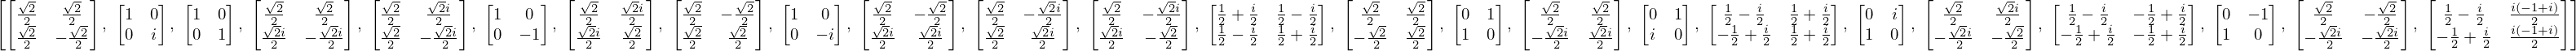

In [6]:
for i in range(5):
    for m in (H, S):
        for c in C_L:
            c = simplify(c*m)
            if(is_known(C_L, c)):
                continue
            C_L.append(c)
C_L

In [7]:
len(C_L)

These are the 24 elements of $C_L$. Required to do further computations is the lookup table containing all the 
products between $C_L$ matrices:

In [8]:
from itertools import product

product_table = []
row = []

for i,p in enumerate(product(C_L, C_L)):
    if(i % 24 == 0):
        product_table.append(row)
        row = []
    row.append(p[0] * p[1])
product_table.append(row)

product_table = product_table[1:]

In [9]:
def get_matrix_index(C_L, a):
    for i,c in enumerate(C_L):
        test = c * Dagger(a)
        if(simplify(getitem(test, 0, 1)) != 0):
            continue
        if(simplify(getitem(test, 0, 0) / getitem(test, 1, 1)) == 1):
            return i
    return None

product_table_indices = [[get_matrix_index(C_L, m) for m in row] for row in product_table]
product_table_indices